In [97]:
import tensorflow as tf
import numpy as np
import datetime
import os
import pathlib
import matplotlib.pyplot as plt
import PIL

In [70]:
%load_ext tensorboard
!mkdir "logs/"
log_dir = "logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


A subdirectory or file logs/ already exists.


In [3]:
%tensorboard --logdir logs


Reusing TensorBoard on port 6006 (pid 12624), started 0:12:28 ago. (Use '!kill 12624' to kill it.)

In [7]:
data_dir_X= pathlib.Path("training images/X")
data_dir_y = pathlib.Path("training images/y")

filenames_X = list(data_dir_X.glob("*.png"))
filenames_y = list(data_dir_y.glob("*.png"))

In [60]:
def process_images(filename):    
    image = tf.io.read_file(filename)
    image = tf.io.decode_png(image)
    image = tf.image.convert_image_dtype(image, tf.float32)

    return image

In [61]:
def parse_image(filename_X, filename_y):
    
    label = process_images(filename_y)

    image = process_images(filename_X)
    return image, label

In [62]:
X_file_name = tf.data.Dataset.list_files("training images/X/*.png")
y_file_name = tf.data.Dataset.list_files("training images/y/*.png")

In [92]:
# old things that where required for learning

filename_X = next(iter(X_file_name))
filename_y = next(iter(y_file_name))

images, labels = parse_image(filename_X, filename_y)
dataset = tf.data.Dataset.from_tensors((images, labels))

dataset_1 = tf.data.Dataset.from_tensor_slices(images)
dataset_2 = tf.data.Dataset.from_tensor_slices(labels)



In [ ]:
dataset_3 = tf.data.Dataset.zip((dataset_1, dataset_2))

In [95]:
dataset_4 = tf.data.Dataset.zip((X_file_name, y_file_name))

In [96]:
images_ds = dataset_4.map(parse_image)

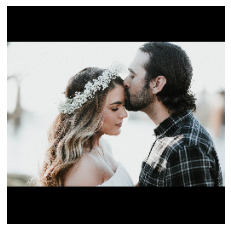

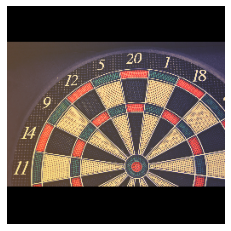

In [110]:
for image, label in images_ds.take(2):
      plt.figure()
      plt.imshow(image)
      plt.axis('off')
      # plt.imshow(label)


In [93]:
dataset_3

<ZipDataset element_spec=(TensorSpec(shape=(256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(512, 3), dtype=tf.float32, name=None))>

In [90]:
for i in dataset:
    print(i[0].numpy().shape)

(256, 256, 3)


In [9]:
print(len(filenames_X), len(filenames_y))

800 800
